In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d durgeshrao9993/laptop-specification-dataset

  0% 0.00/27.8k [00:00<?, ?B/s]
100% 27.8k/27.8k [00:00<00:00, 1.49MB/s]


In [ ]:
!unzip laptop-specification-dataset.zip

Archive:  laptop-specification-dataset.zip
  inflating: laptop_price (1).csv    


In [ ]:
!mv '/content/laptop_price (1).csv' '/content/laptop_price.csv'

# Data Analysis and Preprocessing

## Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/laptop_price.csv", encoding="latin-1")

df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_in_euros      float64
dtype: object

Although clean and concise, most data are in object form, and therefore must be processed to numerical or categorical data for further processing

In [ ]:
for column in df.columns:
  print(df[column].unique())

[   1    2    3 ... 1318 1319 1320]
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'
 'Inspiron 3576' '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)' 'VivoBook Max'
 'GS73VR 7RG' 'X541UA-DM1897 (i3-6006U/4

##Screen Processing

In [ ]:
df["Touchscreen"] = df['ScreenResolution'].str.contains("Touchscreen")

In [ ]:
df['H_Res'] = df['ScreenResolution'].str.extract("(\d+)[x]").astype(int)
df['V_Res'] = df['ScreenResolution'].str.extract("[x](\d+)").astype(int)

df['Aspect_Ratio'] = df['H_Res'] / df['V_Res']

df["Pixel_Density"] = np.sqrt(df['H_Res']**2 + df['V_Res']**2) / df['Inches']

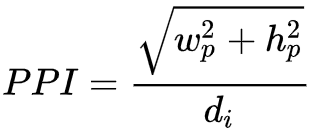

Pixel density is calculated from horizontal pixel length, vertical pixel length and diagonal screen size, represented in pixels per inch

Pixel density is used due to the prevalence of higher end laptops that use higher density screen.

Higher density screens create sharper images and increases the need for higher GPU performance, therefore requiring higher costs.

Touchscreen capability is added and aspect ratio is calculated from the screen resolution

Aspect ratio is used due to the prevalence of taller screen ratios on business and content creation oriented ultrabooks, such as 16:10.

Whereas most laptops intended for gaming and general usage tend to use 16:9.

##Processor Ranking

In [ ]:
processor_conditions = [
    df['Cpu'].str.contains("Pentium|Atom|Celeron|Intel Core i3|AMD A4|AMD A6|AMD E|Cortex", regex=True),
    df['Cpu'].str.contains("Intel Core i5|AMD A8|AMD A9|AMD A10|AMD A12|AMD FX", regex=True),
    df['Cpu'].str.contains("Intel Core i7|Xeon|Core M|Ryzen", regex=True)
]

processor_labels = ['Low-range_CPU', 'Mid-range_CPU', 'High-range_CPU']

In [ ]:
df["Cpu"] = np.select(processor_conditions, processor_labels)

Processors are ranked from their expected performance and description of their respective lineup from notebookcheck.net

Although core clock speed is given in the data, base clock speed may not equate to higher performance and price, this may be true for single core processors, but considering the prevalence of dual-core and quad-core processors, with differing architectures and efficiencies, they may not represent the value that semiconductor manufacturers hold on their processors.

Higher end processors may have the same base clock speed as mid-range processors, but more power consumption, bigger cache, and more turbo capabilities.








Although the accuracy of each grouping is also subject to change due to the ambiguity given by semiconductor manufacturers on naming their lineups. The writer of this notebook also acknowledges that within each category, some processors may perform better than others

For example,

Intel Core i7 7500U

Intel Core i7 7820HK 2.9GHz

Although both processors may be i7 and in the same generation, U-series processors are intended for very low power consumption usages. Whereas HK-series processors are for higher consumption laptops with overclocking capabilites

## GPU Ranking

In [ ]:
gpu_conditions = [
    df['Gpu'].str.contains("Intel|Graphics|AMD Radeon R[0-9]$|R17|ARM", regex=True),
    df['Gpu'].str.contains("Nvidia|AMD Radeon RX|AMD FirePro|AMD Radeon R[0-9] M|AMD Radeon Pro|AMD Radeon 5|AMD Radeon R5 \d+$", regex=True)
]

gpu_labels = ['Int_GPU', 'Dedi_GPU']

In [ ]:
df["Gpu"] = np.select(gpu_conditions, gpu_labels)

Due to the many variety in architecture, performance, and pricing in GPUs, we will only categorize them in the presence of Integrated or Dedicated GPUs.

Dedicated GPUs are mostly given to content creation, and gaming oriented laptops and ultrabooks. Most laptops intended for business and less usage of graphics processing tend to use the integrated graphics processing given by most laptops.

## Memory Processing

In [ ]:
df["Memory_GB"] = df['Memory'].str.extract("(\d+)GB").astype(float)
df["Memory_TB"] = df['Memory'].str.extract("(\d+)TB").astype(float)

df["Memory_GB"] = df['Memory_GB'].fillna(0)
df["Memory_TB"] = df['Memory_TB'].fillna(0)

df["Memory_Size"] = df["Memory_TB"]*1024 + df["Memory_GB"]

In [ ]:
df['Memory_HDD'] = df['Memory'].str.contains("HDD", regex=True)
df['Memory_SSD'] = df['Memory'].str.contains("SSD|Flash", regex=True)

In [ ]:
df["Ram"] = df['Ram'].str.extract("(\d+)GB").astype(int)

Memory size is combined to one data in GB to achieve total ROM size in GB

Memory type is encoded in one hot encoding for SSD and HDD

##Miscellaneous Data Types

In [ ]:
df["OpSys"] =  df["OpSys"].replace(["Windows 10 S"], "Windows 10")

In [ ]:
df["Weight"] = df['Weight'].str[:-2].astype(float)

In [ ]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price_in_euros      float64
Touchscreen            bool
H_Res                 int64
V_Res                 int64
Aspect_Ratio        float64
Pixel_Density       float64
Memory_GB           float64
Memory_TB           float64
Memory_Size         float64
Memory_HDD             bool
Memory_SSD             bool
dtype: object

In [ ]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Touchscreen,H_Res,V_Res,Aspect_Ratio,Pixel_Density,Memory_GB,Memory_TB,Memory_Size,Memory_HDD,Memory_SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Mid-range_CPU,8,128GB SSD,Int_GPU,...,False,2560,1600,1.600000,226.983005,128.0,0.0,128.0,False,True
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Mid-range_CPU,8,128GB Flash Storage,Int_GPU,...,False,1440,900,1.600000,127.677940,128.0,0.0,128.0,False,True
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Mid-range_CPU,8,256GB SSD,Int_GPU,...,False,1920,1080,1.777778,141.211998,256.0,0.0,256.0,False,True
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,High-range_CPU,16,512GB SSD,Dedi_GPU,...,False,2880,1800,1.600000,220.534624,512.0,0.0,512.0,False,True
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Mid-range_CPU,8,256GB SSD,Int_GPU,...,False,2560,1600,1.600000,226.983005,256.0,0.0,256.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,High-range_CPU,4,128GB SSD,Int_GPU,...,True,1920,1080,1.777778,157.350512,128.0,0.0,128.0,False,True
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,High-range_CPU,16,512GB SSD,Int_GPU,...,True,3200,1800,1.777778,276.053530,512.0,0.0,512.0,False,True
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Low-range_CPU,2,64GB Flash Storage,Int_GPU,...,False,1366,768,1.778646,111.935204,64.0,0.0,64.0,False,True
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,High-range_CPU,6,1TB HDD,Dedi_GPU,...,False,1366,768,1.778646,100.454670,0.0,1.0,1024.0,True,False


In [ ]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price_in_euros      float64
Touchscreen            bool
H_Res                 int64
V_Res                 int64
Aspect_Ratio        float64
Pixel_Density       float64
Memory_GB           float64
Memory_TB           float64
Memory_Size         float64
Memory_HDD             bool
Memory_SSD             bool
dtype: object

## Analysis

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


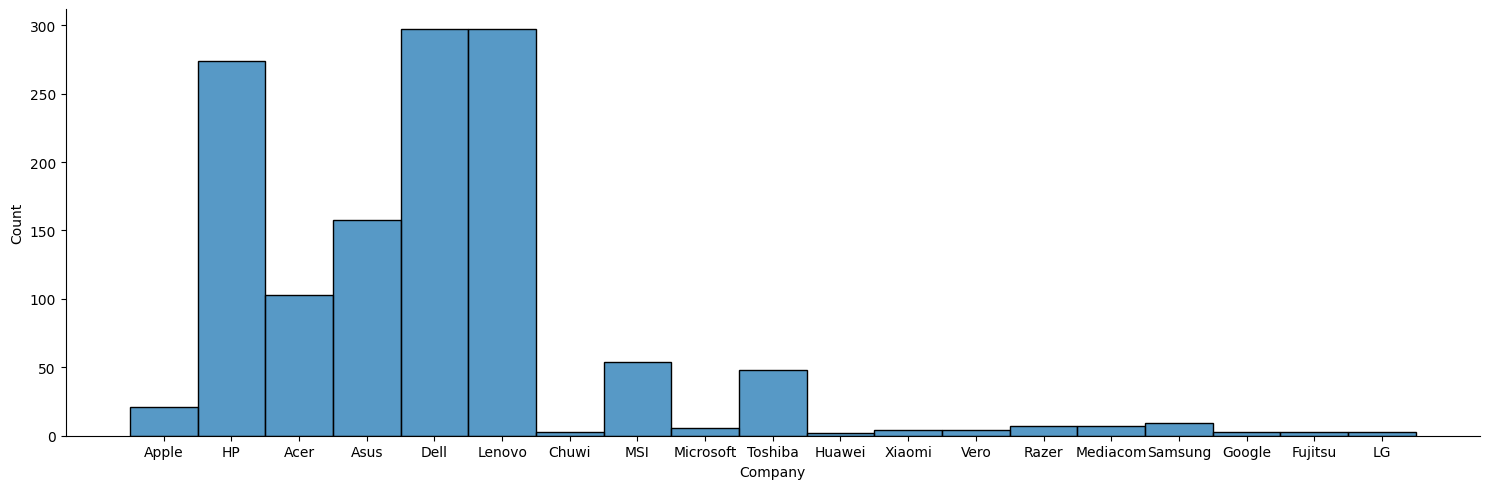

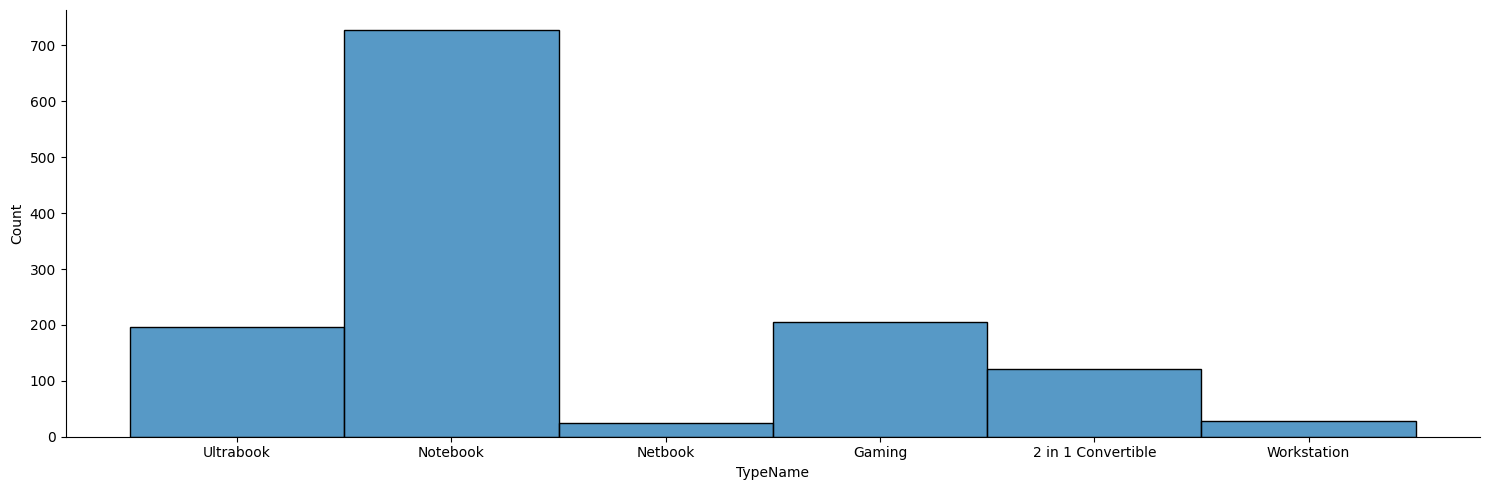

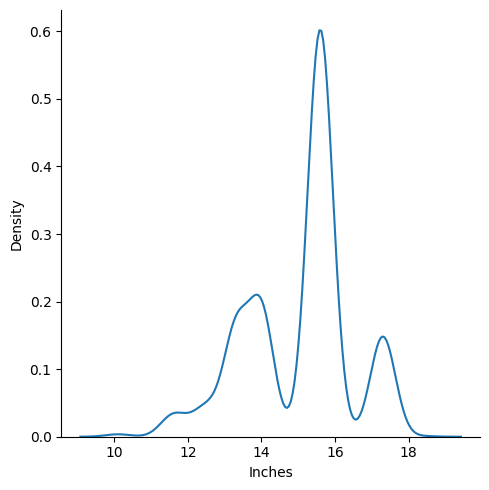

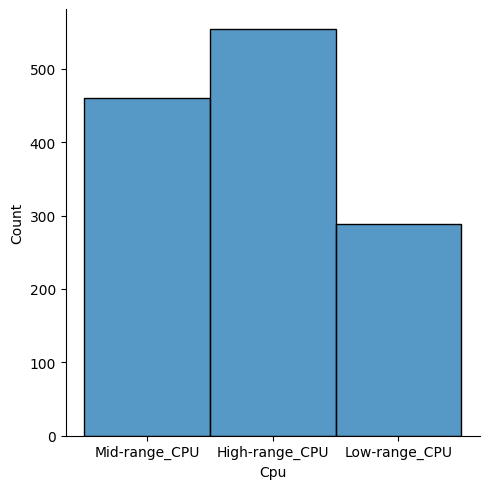

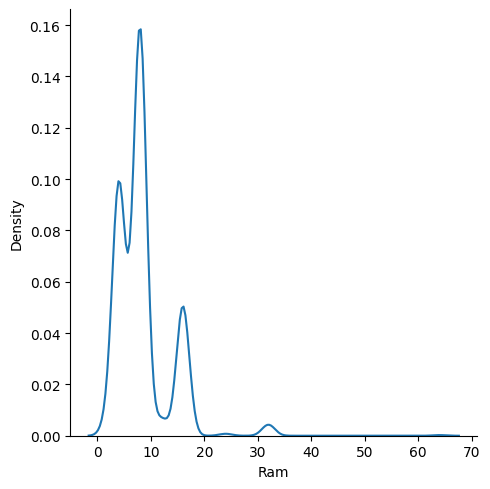

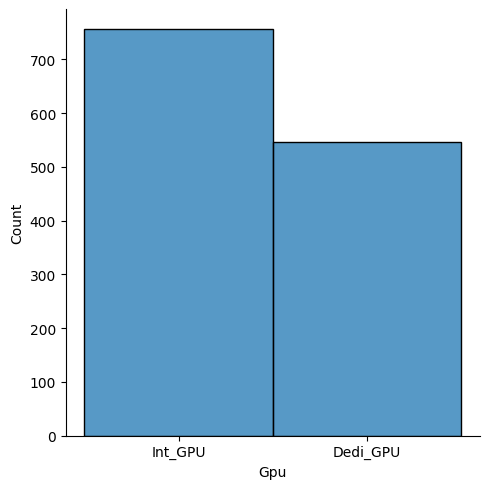

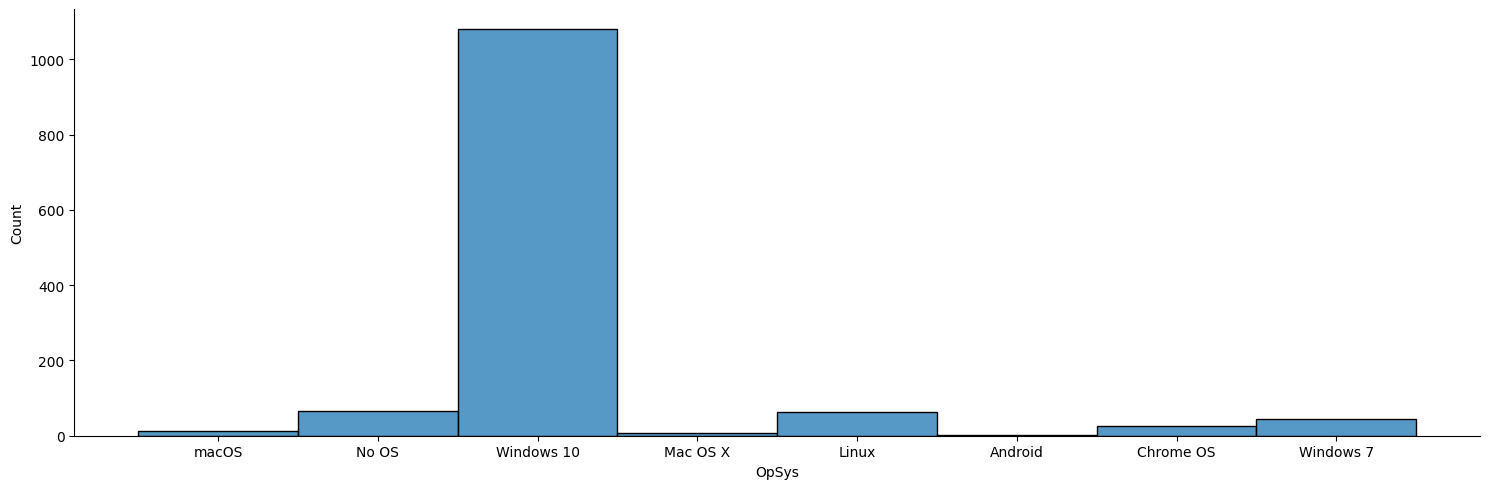

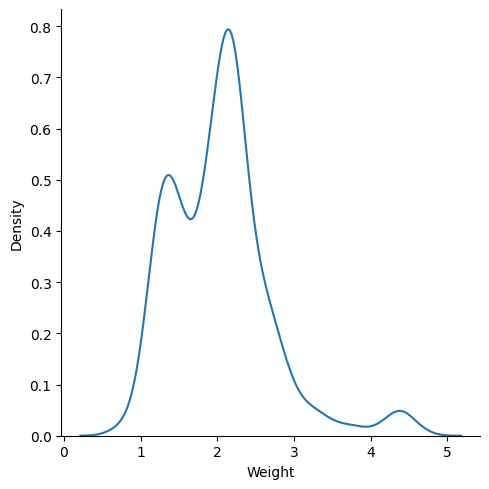

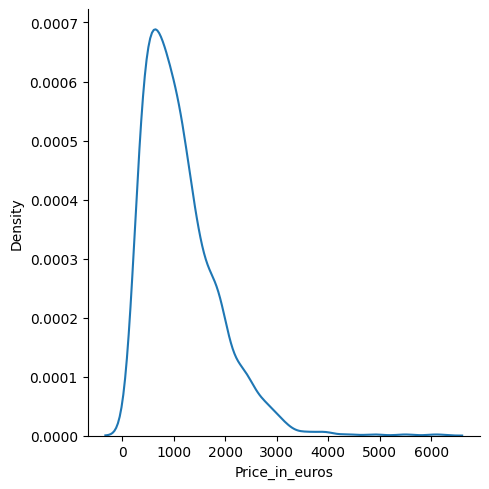

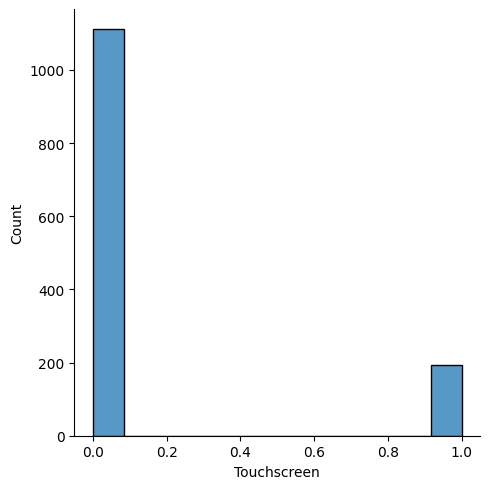

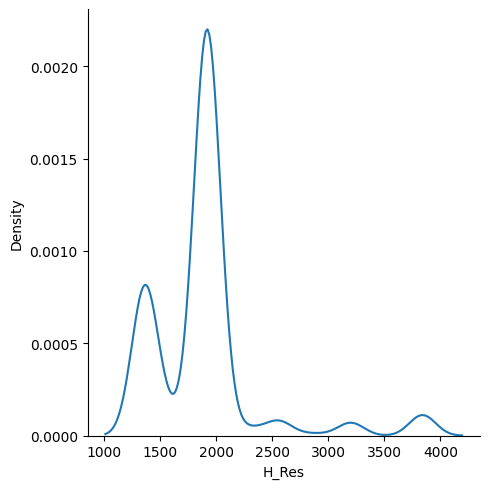

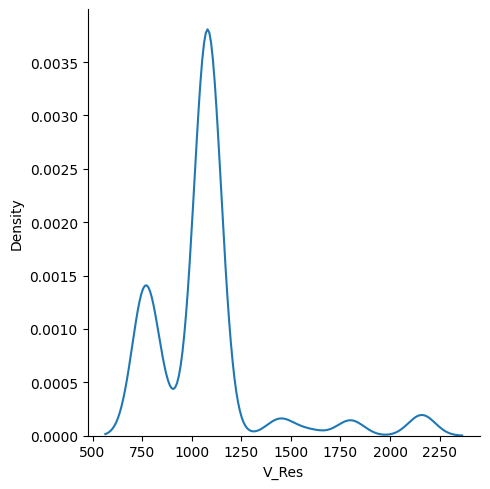

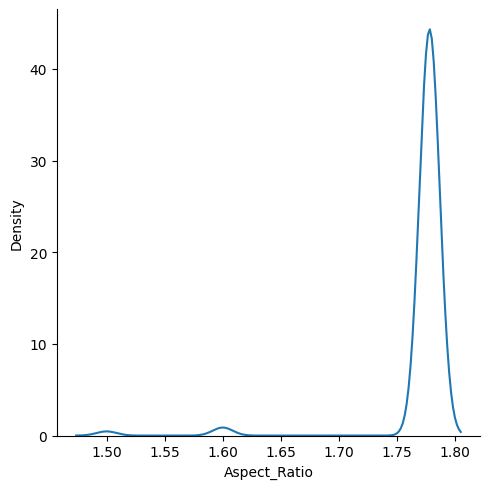

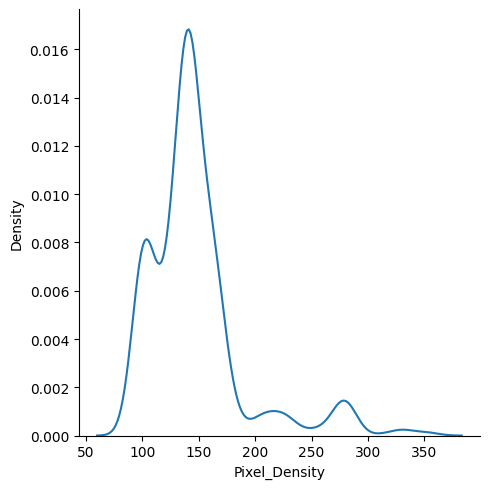

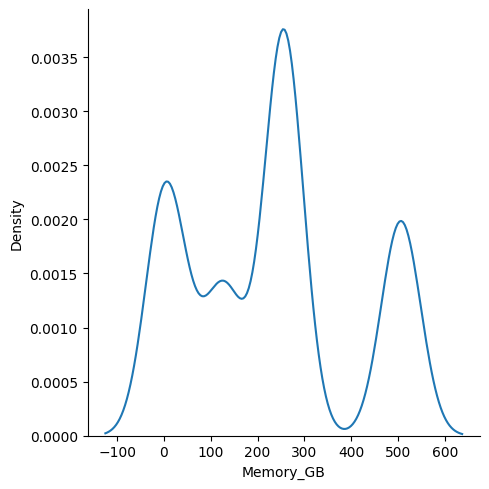

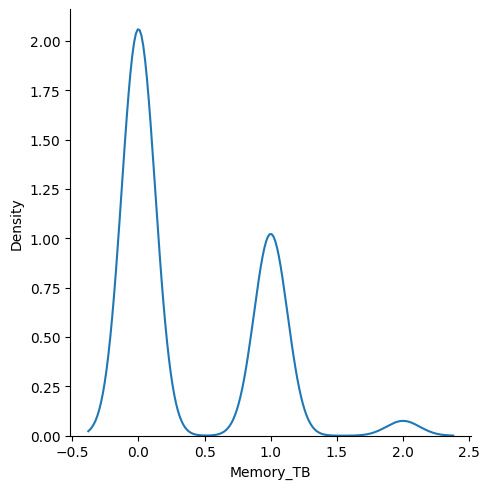

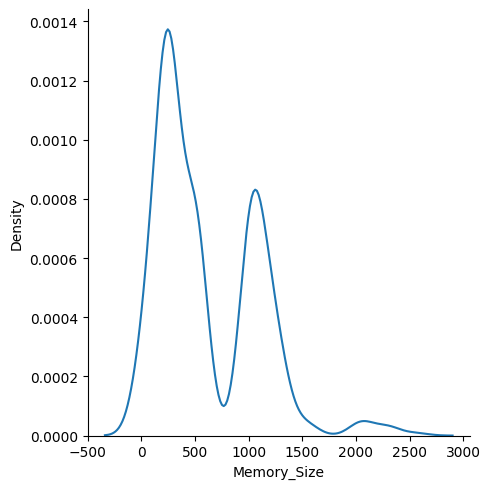

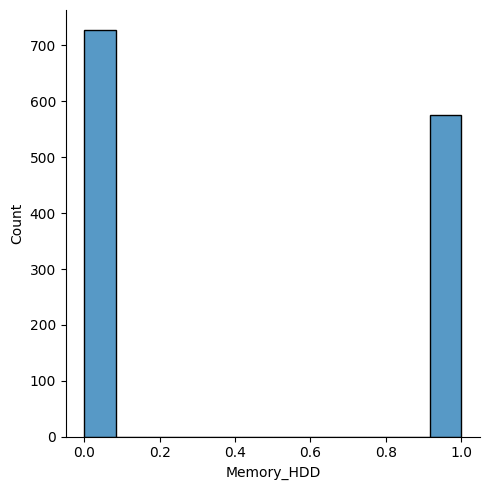

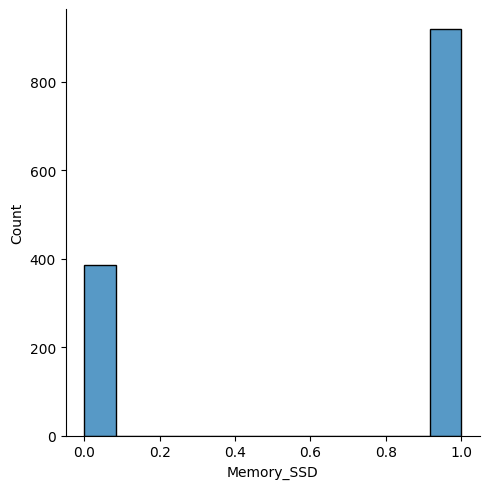

In [ ]:
for column in df.columns:
  if column == "laptop_ID" or column == "Product" or column == "ScreenResolution" or column == "Memory":
    continue
  if column == "TypeName" or column == "Company" or column == "OpSys":
    sns.displot(df[column], aspect=3)
    continue
  if df[column].dtype == int or df[column].dtype == float:
    sns.displot(df[column], kind="kde")
    continue
  sns.displot(df[column])

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


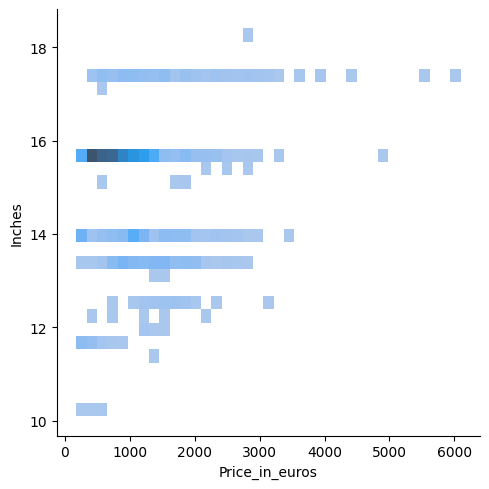

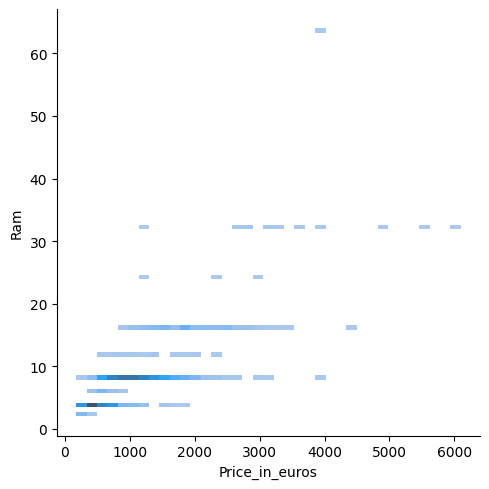

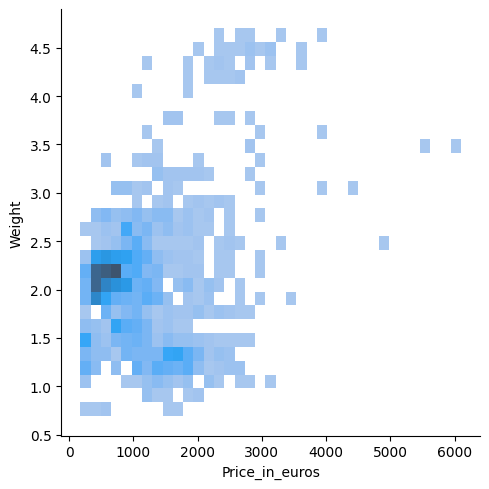

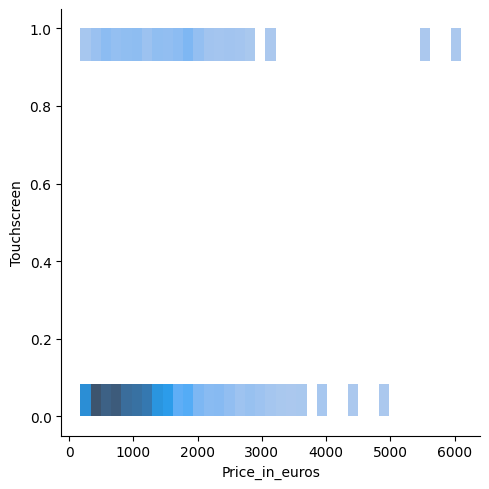

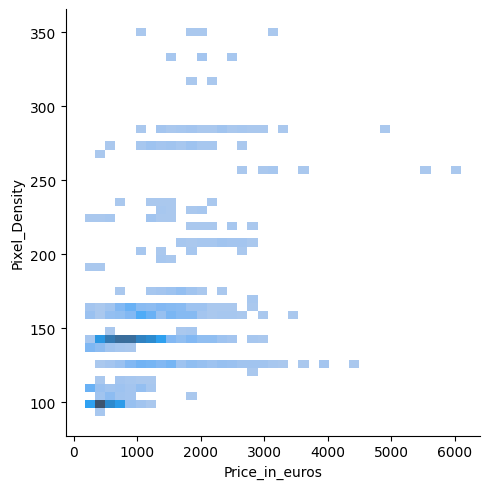

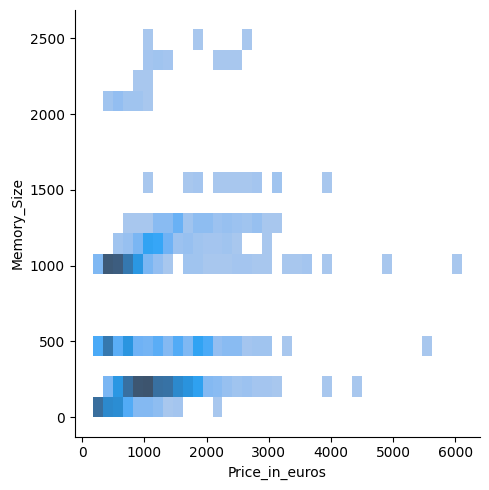

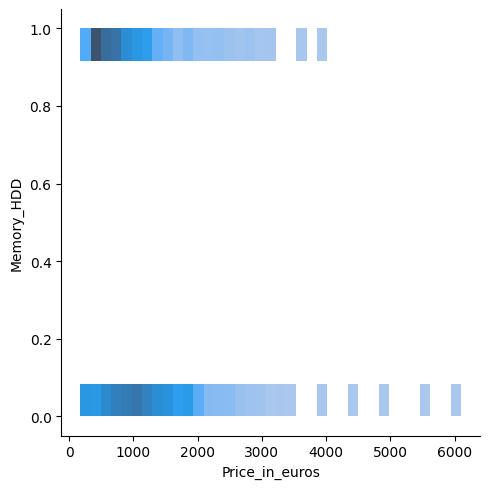

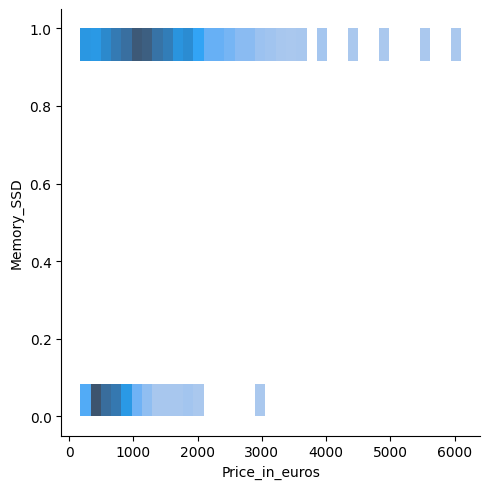

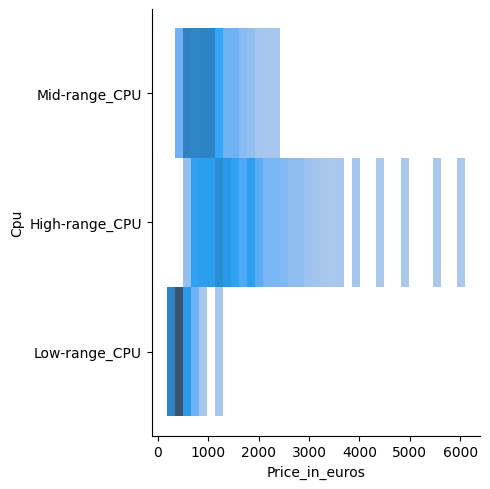

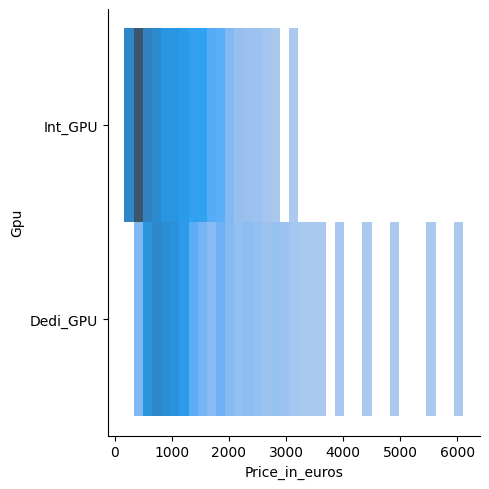

In [ ]:
sns.displot(data=df, x="Price_in_euros", y="Inches")
sns.displot(data=df, x="Price_in_euros", y="Ram")
sns.displot(data=df, x="Price_in_euros", y="Weight")
sns.displot(data=df, x="Price_in_euros", y="Touchscreen")
sns.displot(data=df, x="Price_in_euros", y="Pixel_Density")
sns.displot(data=df, x="Price_in_euros", y="Memory_Size")
sns.displot(data=df, x="Price_in_euros", y="Memory_HDD")
sns.displot(data=df, x="Price_in_euros", y="Memory_SSD")
sns.displot(data=df, x="Price_in_euros", y="Cpu")
sns.displot(data=df, x="Price_in_euros", y="Gpu")

Although some most categorical data are well balanced, and numerical data follows a normal distribution. The data is dominated mostly by mid to low-end business notebooks, with low-end CPUs, integrated GPUs, no touch screen, 16:9 display with low pixel density, less than 16 GB of RAM, and running on Windows 10.

This is not surprising as these general usage notebooks are the type of laptop most popular with consumers.

In [ ]:
sns.pairplot(df, hue="Cpu")

Output hidden; open in https://colab.research.google.com to view.

Laptops with lower end CPUs tend to have lower pixel density, diagonal size, memory size, and RAM.

In [ ]:
sns.pairplot(df, hue="Gpu")

Output hidden; open in https://colab.research.google.com to view.

Laptops with a dedicated GPU tend to be heavier, this may be due to the increased cooling requirements for dedicated GPUs.

It is to be noted that most laptops with dedicated GPUs tend to have lower pixel densities. This may be due to the prevalence of gaming laptops and lower end content creation laptops with AMD GPUs that tend to use lower pixel density screens.

In [ ]:
sns.pairplot(df, hue="Company")

Output hidden; open in https://colab.research.google.com to view.

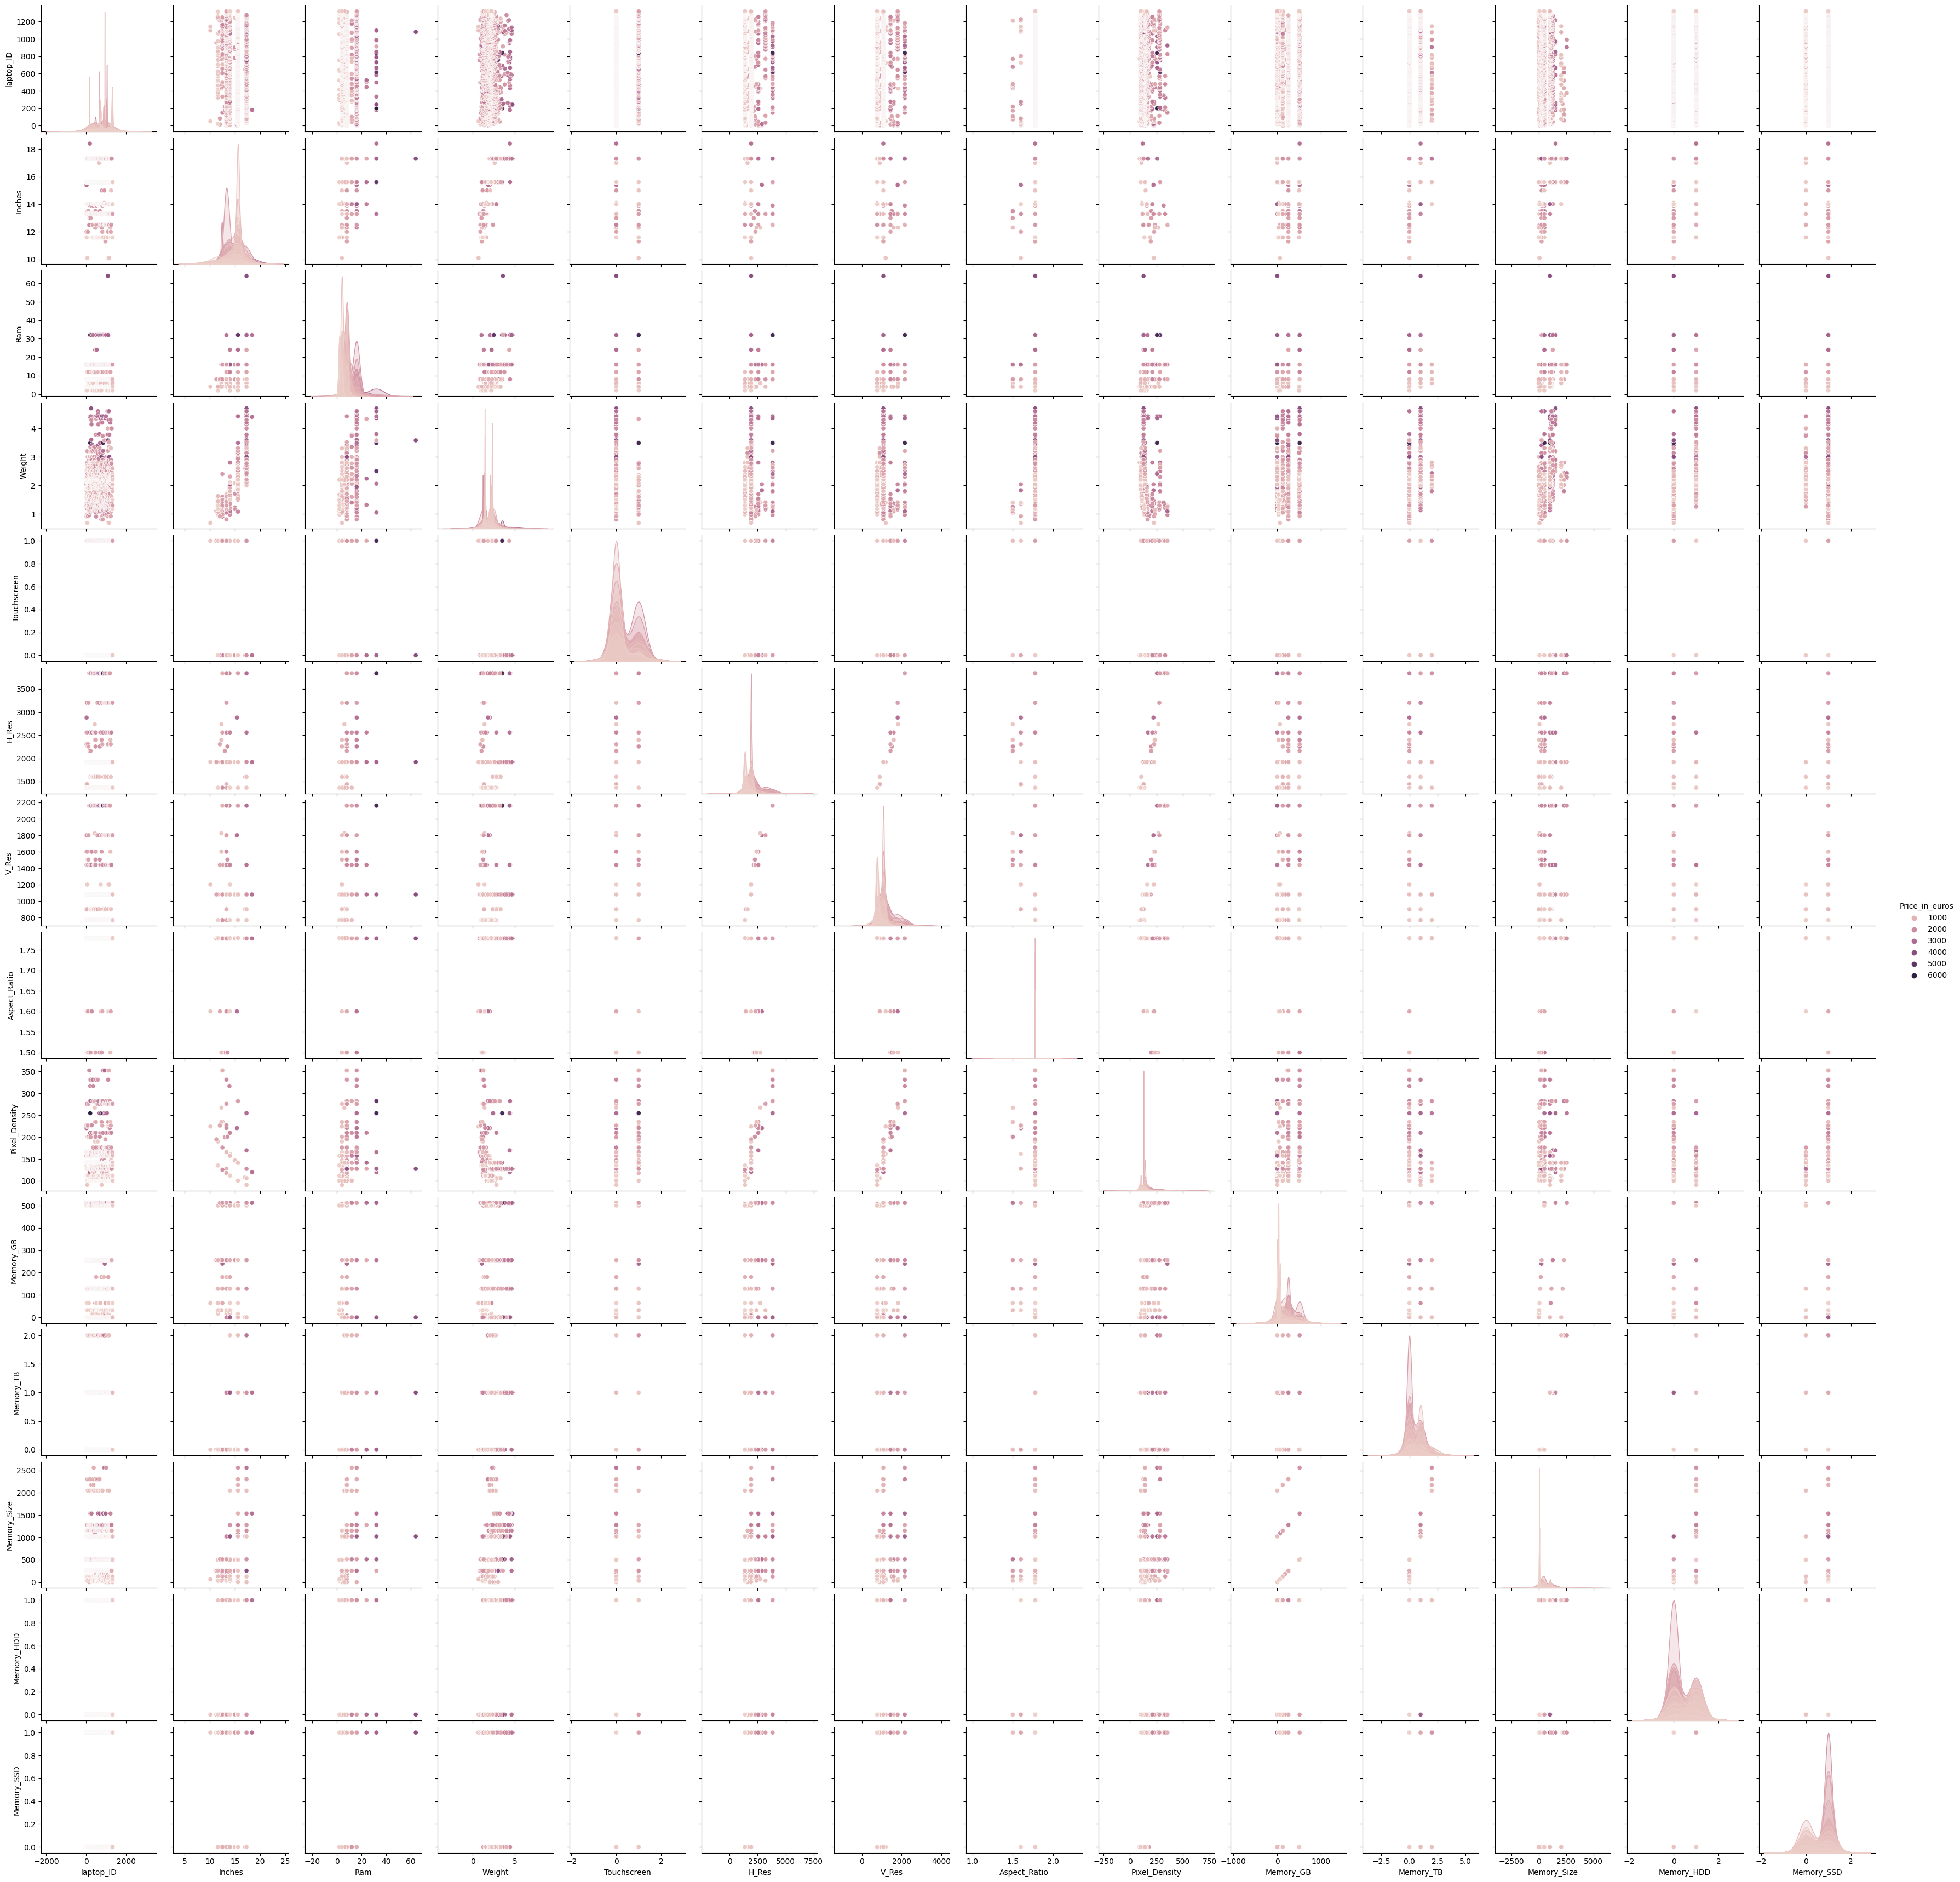

In [ ]:
sns.pairplot(df, hue="Price_in_euros")

More expensive laptops tend to use more RAM, have SSDs

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Company'] = LabelEncoder().fit_transform(df['Company'])
df['TypeName'] = LabelEncoder().fit_transform(df['TypeName'])
df['Cpu'] = LabelEncoder().fit_transform(df['Cpu'])
df['Gpu'] = LabelEncoder().fit_transform(df['Gpu'])
df['OpSys'] = LabelEncoder().fit_transform(df['OpSys'])
df['Touchscreen'] = LabelEncoder().fit_transform(df['Touchscreen'])
df['Memory_HDD'] = LabelEncoder().fit_transform(df['Memory_SSD'])

df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Touchscreen,H_Res,V_Res,Aspect_Ratio,Pixel_Density,Memory_GB,Memory_TB,Memory_Size,Memory_HDD,Memory_SSD
0,1,1,MacBook Pro,4,13.3,IPS Panel Retina Display 2560x1600,2,8,128GB SSD,1,...,0,2560,1600,1.600000,226.983005,128.0,0.0,128.0,1,True
1,2,1,Macbook Air,4,13.3,1440x900,2,8,128GB Flash Storage,1,...,0,1440,900,1.600000,127.677940,128.0,0.0,128.0,1,True
2,3,7,250 G6,3,15.6,Full HD 1920x1080,2,8,256GB SSD,1,...,0,1920,1080,1.777778,141.211998,256.0,0.0,256.0,1,True
3,4,1,MacBook Pro,4,15.4,IPS Panel Retina Display 2880x1800,0,16,512GB SSD,0,...,0,2880,1800,1.600000,220.534624,512.0,0.0,512.0,1,True
4,5,1,MacBook Pro,4,13.3,IPS Panel Retina Display 2560x1600,2,8,256GB SSD,1,...,0,2560,1600,1.600000,226.983005,256.0,0.0,256.0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,Yoga 500-14ISK,0,14.0,IPS Panel Full HD / Touchscreen 1920x1080,0,4,128GB SSD,1,...,1,1920,1080,1.777778,157.350512,128.0,0.0,128.0,1,True
1299,1317,10,Yoga 900-13ISK,0,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,0,16,512GB SSD,1,...,1,3200,1800,1.777778,276.053530,512.0,0.0,512.0,1,True
1300,1318,10,IdeaPad 100S-14IBR,3,14.0,1366x768,1,2,64GB Flash Storage,1,...,0,1366,768,1.778646,111.935204,64.0,0.0,64.0,1,True
1301,1319,7,15-AC110nv (i7-6500U/6GB/1TB/Radeon,3,15.6,1366x768,0,6,1TB HDD,0,...,0,1366,768,1.778646,100.454670,0.0,1.0,1024.0,0,False


In [ ]:
x = df[['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Touchscreen', 'Aspect_Ratio', 'Pixel_Density', 'Memory_Size', 'Memory_HDD', 'Memory_SSD']]
y = df[['Price_in_euros']]

print(x)
print(y)

      Company  TypeName  Inches  Cpu  Ram  Gpu  OpSys  Weight  Touchscreen  \
0           1         4    13.3    2    8    1      7    1.37            0   
1           1         4    13.3    2    8    1      7    1.34            0   
2           7         3    15.6    2    8    1      4    1.86            0   
3           1         4    15.4    0   16    0      7    1.83            0   
4           1         4    13.3    2    8    1      7    1.37            0   
...       ...       ...     ...  ...  ...  ...    ...     ...          ...   
1298       10         0    14.0    0    4    1      5    1.80            1   
1299       10         0    13.3    0   16    1      5    1.30            1   
1300       10         3    14.0    1    2    1      5    1.50            0   
1301        7         3    15.6    0    6    0      5    2.19            0   
1302        2         3    15.6    1    4    1      5    2.20            0   

      Aspect_Ratio  Pixel_Density  Memory_Size  Memory_HDD  Mem

# Prediction

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

Feature scaling is used due to the differences in value range of the data.

Since we know that although some are, not all data are normally distributed, we use MinMax Scaler for feature scaling. As StandardScaler assumes that all data are normally distributed.

The models used for this experiment are :

Linear Regression

Random Forest Regression

K-Nearest Neighbours Regression

Validation will be performed using 5-Fold Cross Validation, where the data will be split to 5 random and distinctly different test sets.

MinMax Scaler will be fitted to each train data, and transformed onto both. After this, the train data will be fitted to the defined model, and evaluated using each test set.

The results will be taken from the mean of each evaluation done on each fold.

In [ ]:
scaler = MinMaxScaler()
cv = KFold(n_splits=5, shuffle=True, random_state=100)
linreg = LinearRegression()
rf = RandomForestRegressor()
knn = KNeighborsRegressor()

In [ ]:
pipeline = Pipeline([('scaler', scaler), ('model', linreg)])

R2_scores = cross_val_score(pipeline, x, y.values.ravel(), cv= cv)
MAE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv,scoring="neg_mean_absolute_error")
MAPE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv,scoring="neg_mean_absolute_percentage_error")
MSE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv, scoring="neg_mean_squared_error")
RMSE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv, scoring="neg_root_mean_squared_error")

for i, (train_index, test_index) in enumerate(cv.split(x)):
  print(f"Iteration {i+1}:")
  print(f"Score: R2 {R2_scores[i]}, MAE = {MAE_scores[i]}, MAPE = {MAPE_scores[i]}, MSE = {MSE_scores[i]}, RMSE = {RMSE_scores[i]}")
print("")
print("Final Scores:")
print(f"R2 = {R2_scores.mean()}")
print(f"MAE = {MAE_scores.mean()}")
print(f"MAPE = {MAPE_scores.mean()}")
print(f"MSE = {MSE_scores.mean()}")
print(f"RMSE = {RMSE_scores.mean()}")

Iteration 1:
Score: R2 0.6965286494614229, MAE = -291.6067241609145, MAPE = -0.4041017565655176, MSE = -142877.60969168588, RMSE = -377.99154711671247
Iteration 2:
Score: R2 0.7023448563116264, MAE = -294.6525647979914, MAPE = -0.33354106361425306, MSE = -146325.74174755436, RMSE = -382.52547855999654
Iteration 3:
Score: R2 0.650788975971494, MAE = -290.0351513773772, MAPE = -0.30671396465931466, MSE = -177515.9385021805, RMSE = -421.32640375625704
Iteration 4:
Score: R2 0.5796825562142238, MAE = -307.67708839469327, MAPE = -0.32968329757249937, MSE = -177374.09102049653, RMSE = -421.1580356831584
Iteration 5:
Score: R2 0.7094014494900376, MAE = -295.9532446318955, MAPE = -0.32680129880506054, MSE = -156395.78769826386, RMSE = -395.4690729984633

Final Scores:
R2 = 0.6677492974897611
MAE = -295.98495467257436
MAPE = -0.340168276243329
MSE = -160097.83373203623
RMSE = -399.69410762291756


In [ ]:
pipeline = Pipeline([('scaler', scaler), ('model', rf)])

R2_scores = cross_val_score(pipeline, x, y.values.ravel(), cv= cv)
MAE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv,scoring="neg_mean_absolute_error")
MAPE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv,scoring="neg_mean_absolute_percentage_error")
MSE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv, scoring="neg_mean_squared_error")
RMSE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv, scoring="neg_root_mean_squared_error")

for i, (train_index, test_index) in enumerate(cv.split(x)):
  print(f"Iteration {i+1}:")
  print(f"Score: R2 {R2_scores[i]}, MAE = {MAE_scores[i]}, MAPE = {MAPE_scores[i]}, MSE = {MSE_scores[i]}, RMSE = {RMSE_scores[i]}")
print("")
print("Final Scores:")
print(f"R2 = {R2_scores.mean()}")
print(f"MAE = {MAE_scores.mean()}")
print(f"MAPE = {MAPE_scores.mean()}")
print(f"MSE = {MSE_scores.mean()}")
print(f"RMSE = {RMSE_scores.mean()}")

Iteration 1:
Score: R2 0.8101008818296607, MAE = -181.9110286025969, MAPE = -0.17909366004261842, MSE = -83617.67924916492, RMSE = -289.22868259448074
Iteration 2:
Score: R2 0.8163495625209506, MAE = -203.4644076984127, MAPE = -0.1833043229027732, MSE = -92043.46668178574, RMSE = -302.60344085221465
Iteration 3:
Score: R2 0.811025064976771, MAE = -196.78672346834517, MAPE = -0.17753986674820055, MSE = -98619.7605309832, RMSE = -316.88634366272674
Iteration 4:
Score: R2 0.7197964549121159, MAE = -193.80504791200465, MAPE = -0.16907430223376543, MSE = -110104.60334985501, RMSE = -343.3638481024137
Iteration 5:
Score: R2 0.8475159247614125, MAE = -188.21079520024415, MAPE = -0.16748996241000197, MSE = -87055.1254034207, RMSE = -287.36681841449695

Final Scores:
R2 = 0.8009575778001821
MAE = -192.8356005763207
MAPE = -0.17530042286747188
MSE = -94288.12704304191
RMSE = -307.8898267252666


In [ ]:
pipeline = Pipeline([('scaler', scaler), ('model', knn)])

R2_scores = cross_val_score(pipeline, x, y.values.ravel(), cv= cv)
MAE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv,scoring="neg_mean_absolute_error")
MAPE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv,scoring="neg_mean_absolute_percentage_error")
MSE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv, scoring="neg_mean_squared_error")
RMSE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv, scoring="neg_root_mean_squared_error")

for i, (train_index, test_index) in enumerate(cv.split(x)):
  print(f"Iteration {i+1}:")
  print(f"Score: R2 {R2_scores[i]}, MAE = {MAE_scores[i]}, MAPE = {MAPE_scores[i]}, MSE = {MSE_scores[i]}, RMSE = {RMSE_scores[i]}")
print("")
print("Final Scores:")
print(f"R2 = {R2_scores.mean()}")
print(f"MAE = {MAE_scores.mean()}")
print(f"MAPE = {MAPE_scores.mean()}")
print(f"MSE = {MSE_scores.mean()}")
print(f"RMSE = {RMSE_scores.mean()}")

Iteration 1:
Score: R2 0.7423712017477135, MAE = -234.21013026819924, MAPE = -0.2457100129669659, MSE = -121294.43789900384, RMSE = -348.2735101884779
Iteration 2:
Score: R2 0.7743663952375551, MAE = -224.14616091954022, MAPE = -0.2106660587924063, MSE = -110920.32266240612, RMSE = -333.0470277039057
Iteration 3:
Score: R2 0.7100097264937857, MAE = -244.2047126436782, MAPE = -0.21711631536551051, MSE = -147412.0002401686, RMSE = -383.942704371588
Iteration 4:
Score: R2 0.6836834067442822, MAE = -249.1958, MAPE = -0.23605662508569852, MSE = -133485.699994, RMSE = -365.3569487419118
Iteration 5:
Score: R2 0.7102947576074785, MAE = -241.79809999999998, MAPE = -0.22918554743727662, MSE = -155915.02264819999, RMSE = -394.8607636220646

Final Scores:
R2 = 0.724145097566163
MAE = -238.7109807662835
MAPE = -0.22774691192957158
MSE = -133805.4966887557
RMSE = -365.0961909255896


Fine Tuning

In [ ]:
scaler = MinMaxScaler()
cv = KFold(n_splits=5, shuffle=True, random_state=100)
linreg = LinearRegression()
rf = RandomForestRegressor(n_estimators=250, max_depth=50, criterion="absolute_error")
knn = KNeighborsRegressor(n_neighbors=2)

In [ ]:
pipeline = Pipeline([('scaler', scaler), ('model', knn)])

R2_scores = cross_val_score(pipeline, x, y.values.ravel(), cv= cv)
MAE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv,scoring="neg_mean_absolute_error")
MAPE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv,scoring="neg_mean_absolute_percentage_error")
MSE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv, scoring="neg_mean_squared_error")
RMSE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv, scoring="neg_root_mean_squared_error")

for i, (train_index, test_index) in enumerate(cv.split(x)):
  print(f"Iteration {i+1}:")
  print(f"Score: R2 {R2_scores[i]}, MAE = {MAE_scores[i]}, MAPE = {MAPE_scores[i]}, MSE = {MSE_scores[i]}, RMSE = {RMSE_scores[i]}")
print("")
print("Final Scores:")
print(f"R2 = {R2_scores.mean()}")
print(f"MAE = {MAE_scores.mean()}")
print(f"MAPE = {MAPE_scores.mean()}")
print(f"MSE = {MSE_scores.mean()}")
print(f"RMSE = {RMSE_scores.mean()}")

Iteration 1:
Score: R2 0.7513592131788132, MAE = -223.32482758620688, MAPE = -0.2285738799033195, MSE = -117062.78444348658, RMSE = -342.14439122026624
Iteration 2:
Score: R2 0.7669997159991071, MAE = -233.47406130268203, MAPE = -0.22544755769828706, MSE = -114541.7443869732, RMSE = -338.44016367295
Iteration 3:
Score: R2 0.7673910653733591, MAE = -236.61994252873563, MAPE = -0.21762547156092024, MSE = -118243.09799243296, RMSE = -343.8649414994686
Iteration 4:
Score: R2 0.7200066587167351, MAE = -229.84446153846153, MAPE = -0.21548534473067665, MSE = -118157.27644942307, RMSE = -343.74012923925983
Iteration 5:
Score: R2 0.7615736150517016, MAE = -240.51440384615384, MAPE = -0.222377739924714, MSE = -128317.50955605769, RMSE = -358.2143346602111

Final Scores:
R2 = 0.7534660536639433
MAE = -232.75553936044793
MAPE = -0.22190199876358346
MSE = -119264.4825656747
RMSE = -345.2807920584312


In [ ]:
pipeline = Pipeline([('scaler', scaler), ('model', rf)])

R2_scores = cross_val_score(pipeline, x, y.values.ravel(), cv= cv)
MAE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv,scoring="neg_mean_absolute_error")
MAPE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv,scoring="neg_mean_absolute_percentage_error")
MSE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv, scoring="neg_mean_squared_error")
RMSE_scores = cross_val_score(pipeline, x, y.values.ravel(), cv = cv, scoring="neg_root_mean_squared_error")

for i, (train_index, test_index) in enumerate(cv.split(x)):
  print(f"Iteration {i+1}:")
  print(f"Score: R2 {R2_scores[i]}, MAE = {MAE_scores[i]}, MAPE = {MAPE_scores[i]}, MSE = {MSE_scores[i]}, RMSE = {RMSE_scores[i]}")
print("")
print("Final Scores:")
print(f"R2 = {R2_scores.mean()}")
print(f"MAE = {MAE_scores.mean()}")
print(f"MAPE = {MAPE_scores.mean()}")
print(f"MSE = {MSE_scores.mean()}")
print(f"RMSE = {RMSE_scores.mean()}")

Iteration 1:
Score: R2 0.8095794989573866, MAE = -183.13355118773939, MAPE = -0.17369497503886638, MSE = -92976.16293101695, RMSE = -299.59866136548885
Iteration 2:
Score: R2 0.81614209704385, MAE = -199.86097233716472, MAPE = -0.18874913354691894, MSE = -87659.46127962915, RMSE = -300.5948551204961
Iteration 3:
Score: R2 0.8024574912673543, MAE = -196.41659203065137, MAPE = -0.17515904066353813, MSE = -95936.9373394433, RMSE = -314.23120987729305
Iteration 4:
Score: R2 0.777499255771469, MAE = -186.21414776923072, MAPE = -0.16438714527442427, MSE = -95217.53792737742, RMSE = -306.20251098715414
Iteration 5:
Score: R2 0.8481132490907527, MAE = -188.89438299999998, MAPE = -0.1684819498348711, MSE = -81070.57513331037, RMSE = -281.30902449946433

Final Scores:
R2 = 0.8107583184261624
MAE = -190.90392926495724
MAPE = -0.17409444887172376
MSE = -90572.13492215544
RMSE = -300.3872523699793
